# Author Detail
**Name: Ahmed Islam**

**Email: ahmideveloper@gmail.com**



Feel free to connect with me on the following platforms:





[![GitHub](https://img.shields.io/badge/GitHub-Profile-informational?style=flat&logo=github&logoColor=white&color=blue)](https://github.com/Ahmed-Islam-AI)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-informational?style=flat&logo=kaggle&logoColor=white&color=blue)](https://www.kaggle.com/ahmedislam0)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-informational?style=flat&logo=linkedin&logoColor=white&color=0077B5)](https://www.linkedin.com/in/ahmed-islam01)


## Overview About the Project

    The objective is to predict based on diagnostic measurements whether a patient has diabetes or not.

# Important Libraries

1. Predicting Diabetes Onset Using Logistic Regression
Dataset:

- Diabetes Dataset   

**Preprocessing Steps:**
- Handle missing values if any.

- Standardize features.

- Encode categorical variables if any.

**Task:**

Implement logistic regression to predict diabetes onset and evaluate the model using accuracy, precision, and recall.


In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [3]:
# Dataset Loading
df = pd.read_csv('/content/diabetes.csv')

# Understanding Dataset
  

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# checking the duplicated values
dv = df.duplicated().sum()
print(f'There is',dv,'duplicated values in The dataset')

There is 0 duplicated values in The dataset


**There is no Null or missing values so we are good to go.**


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


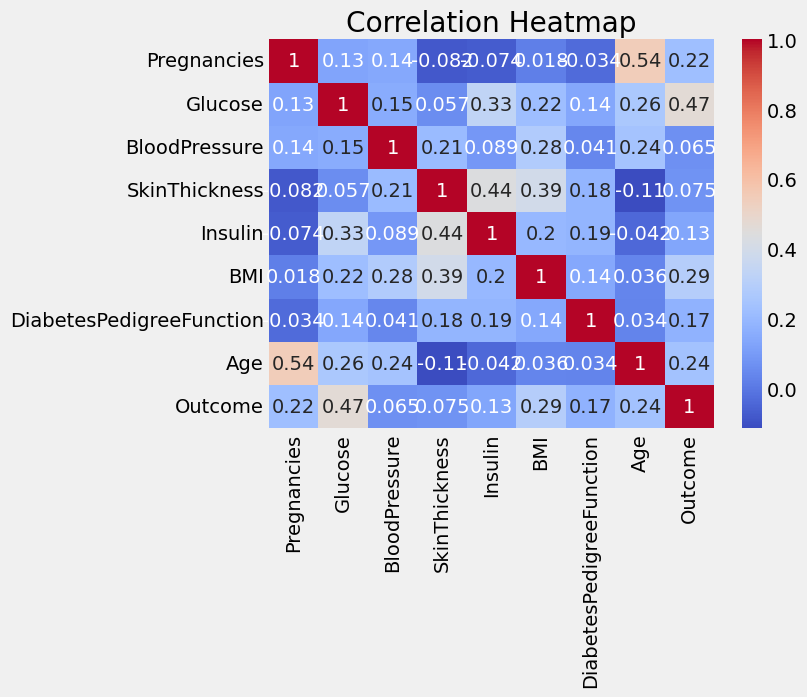

In [ ]:
#correlation metrix

diabetes_corr = df.corr()
sns.heatmap(diabetes_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Data Visualization

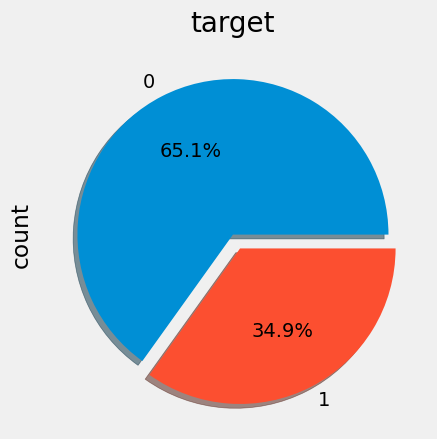

In [8]:
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", shadow=True)
plt.title('target')
plt.show()

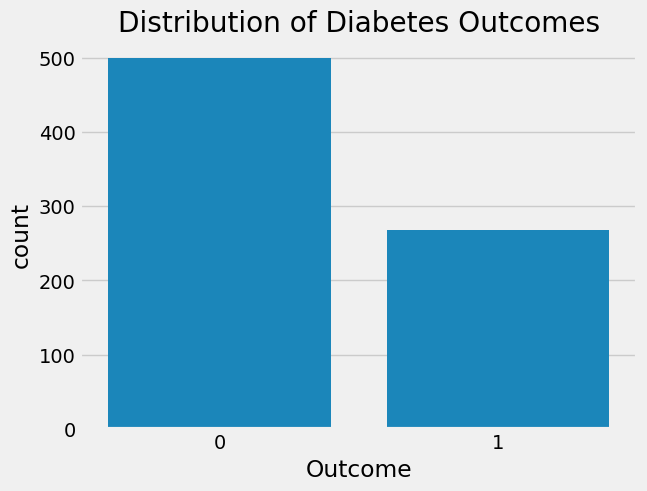

In [ ]:
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcomes')
plt.show()

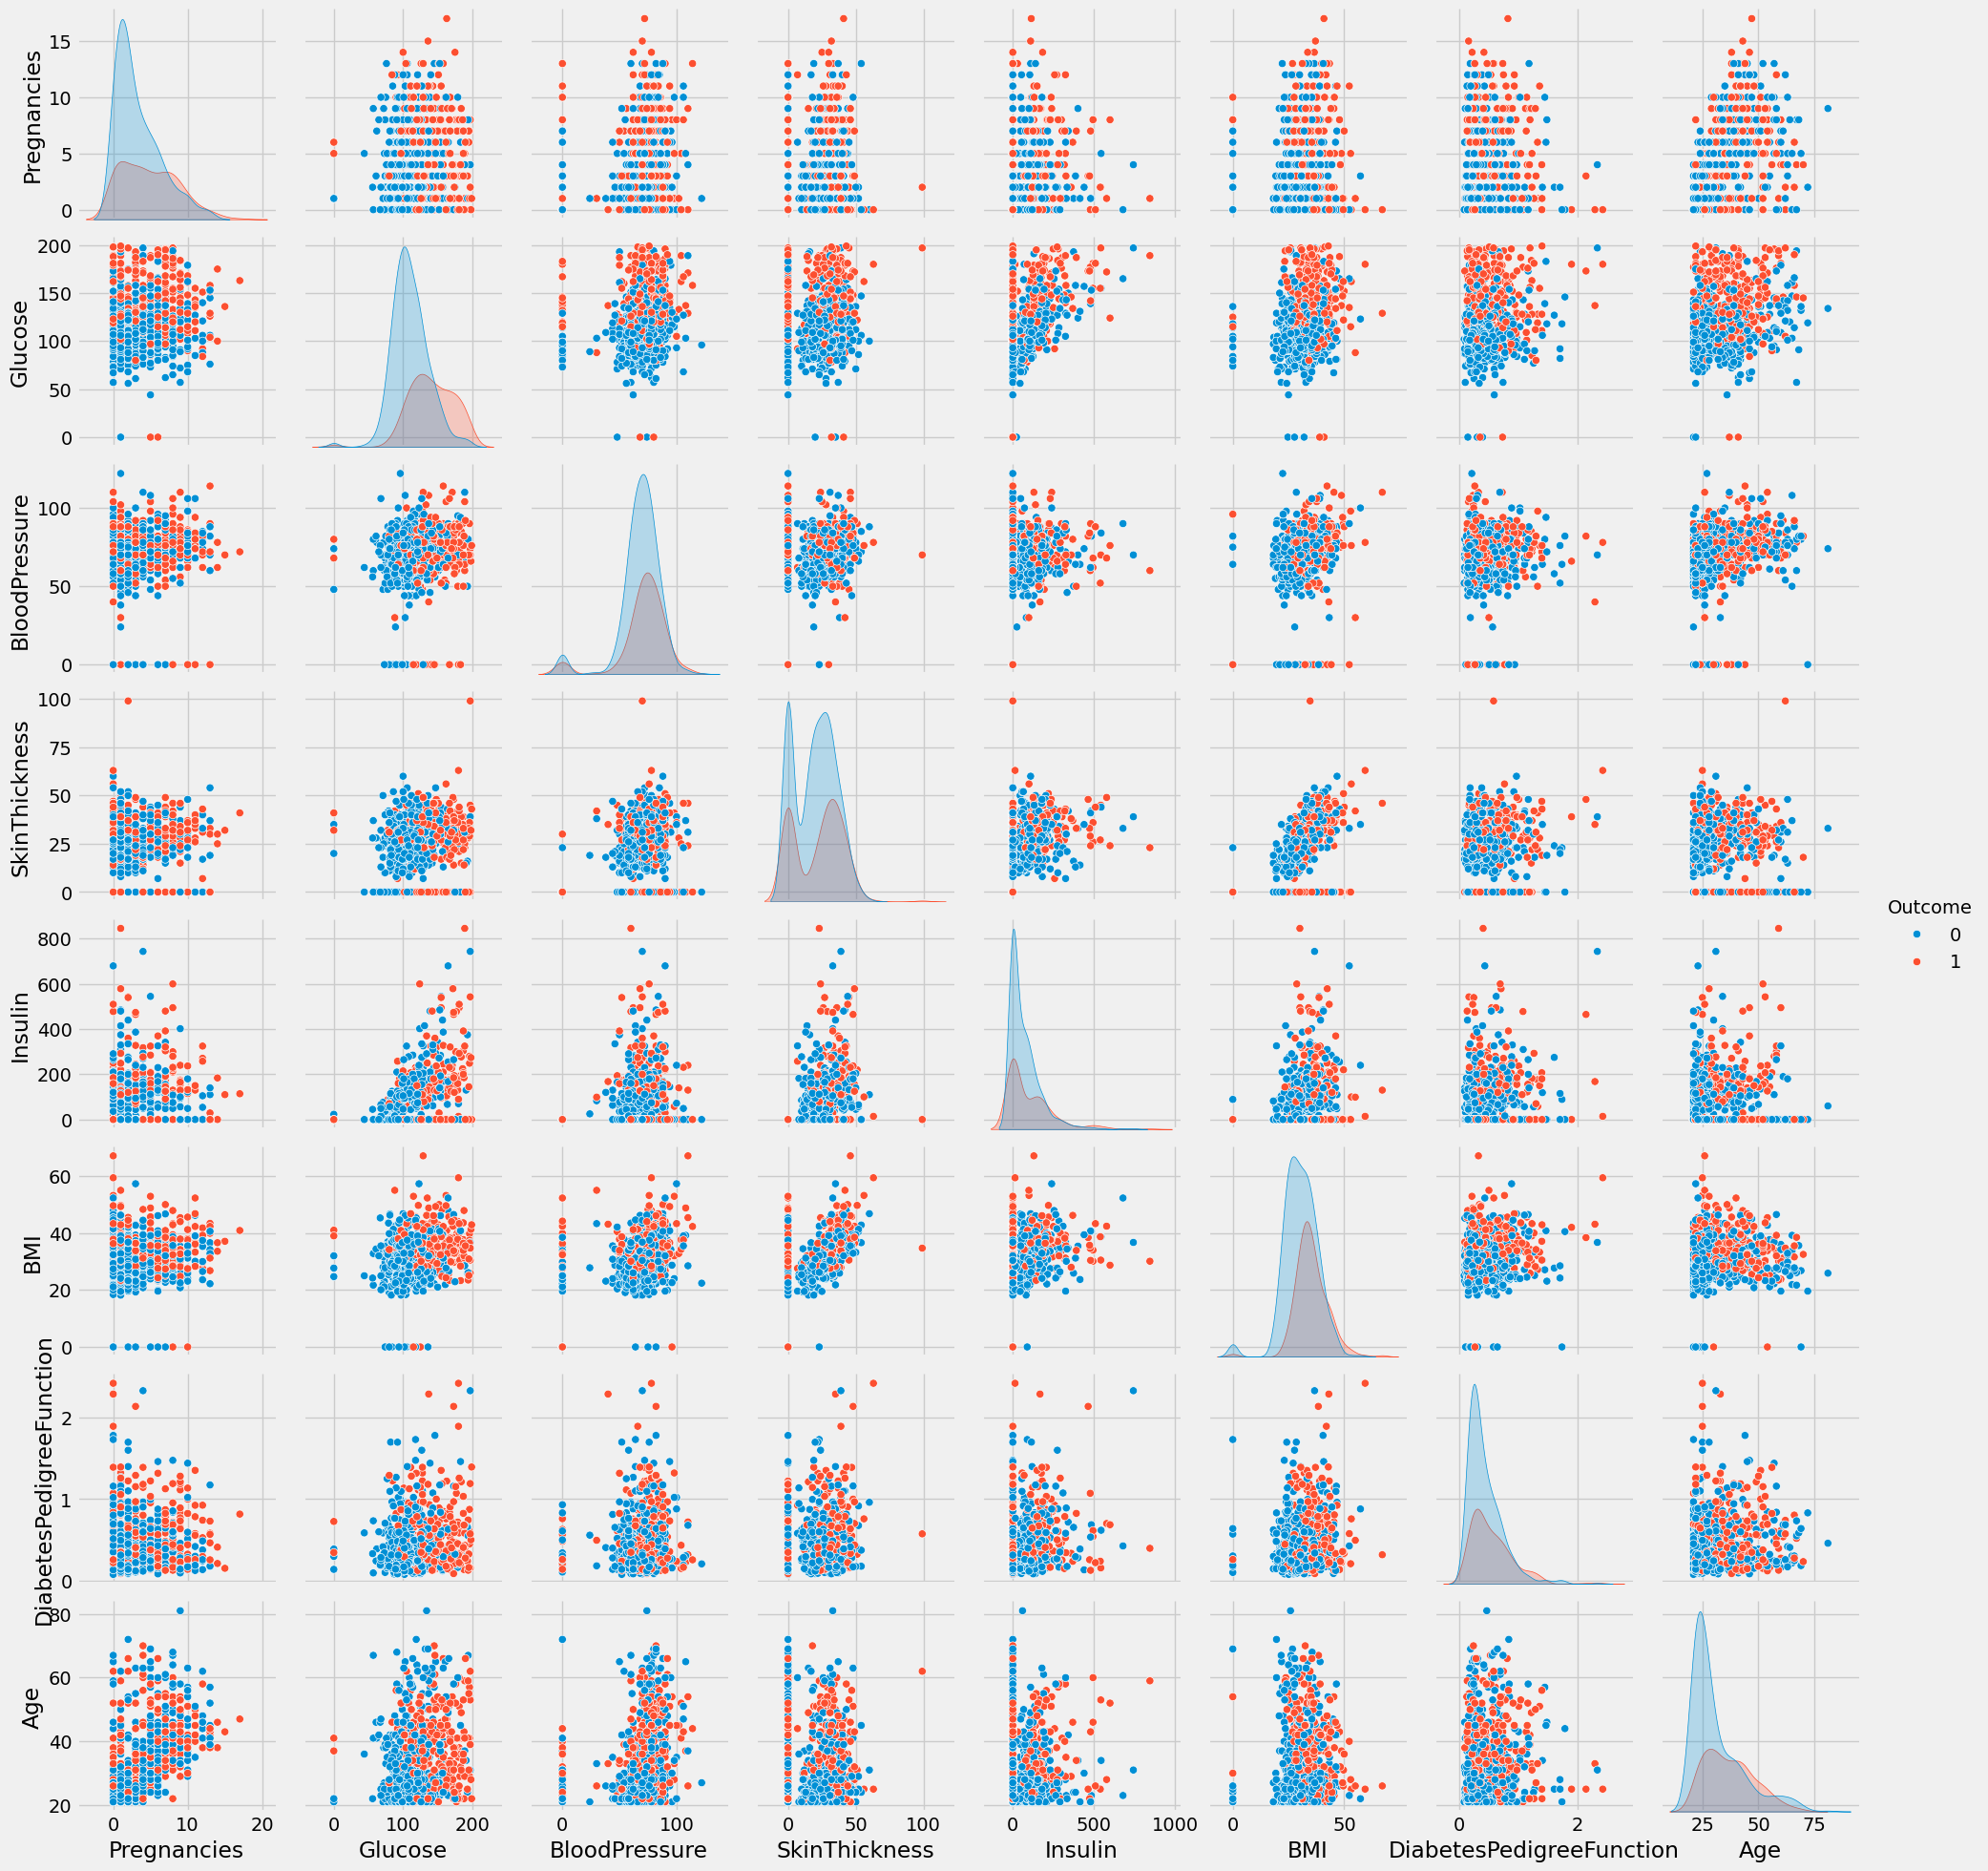

In [ ]:
# pair plot
sns.pairplot(df, hue="Outcome")

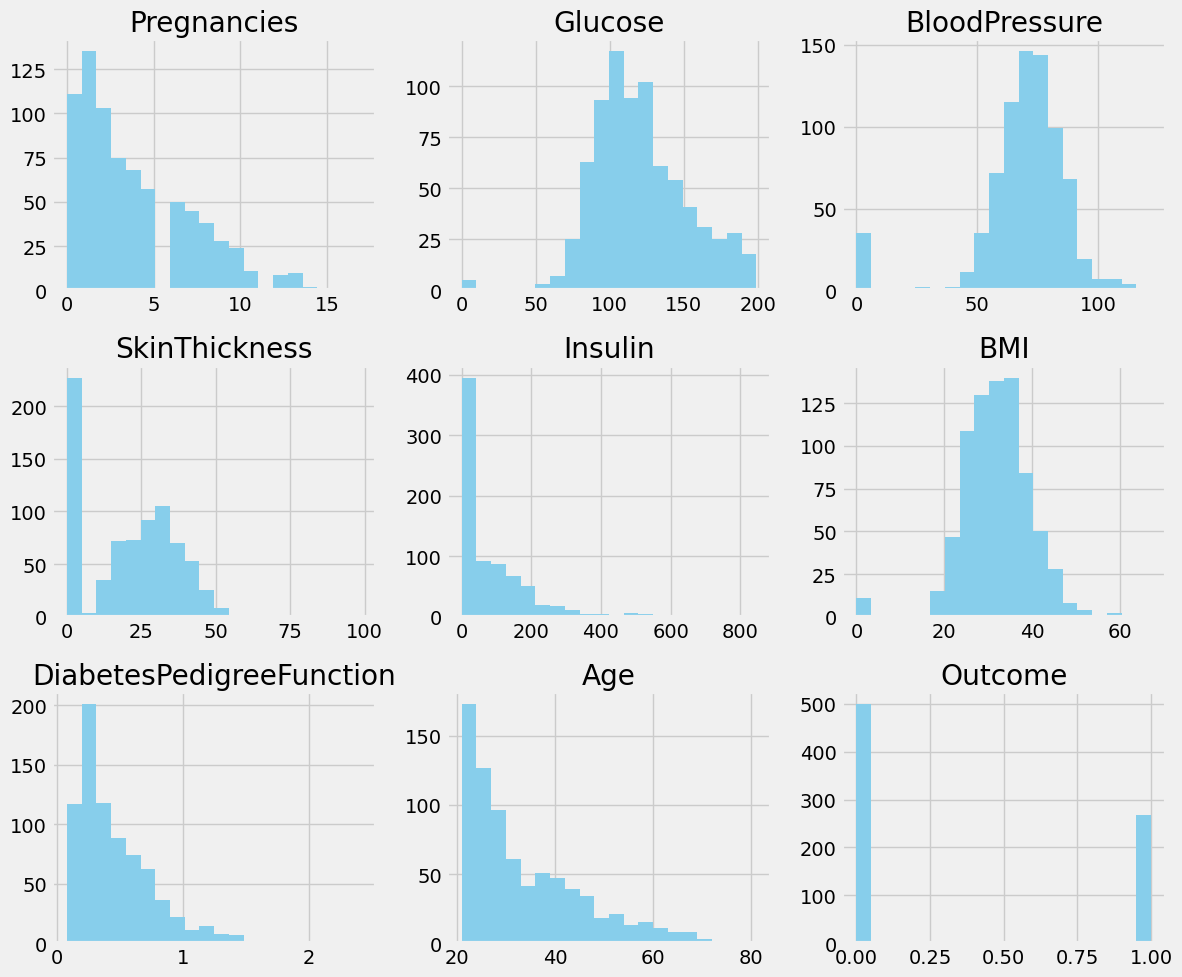

In [10]:
df.hist(figsize=(12, 10), bins=20,color='skyblue')
plt.tight_layout()
plt.show()

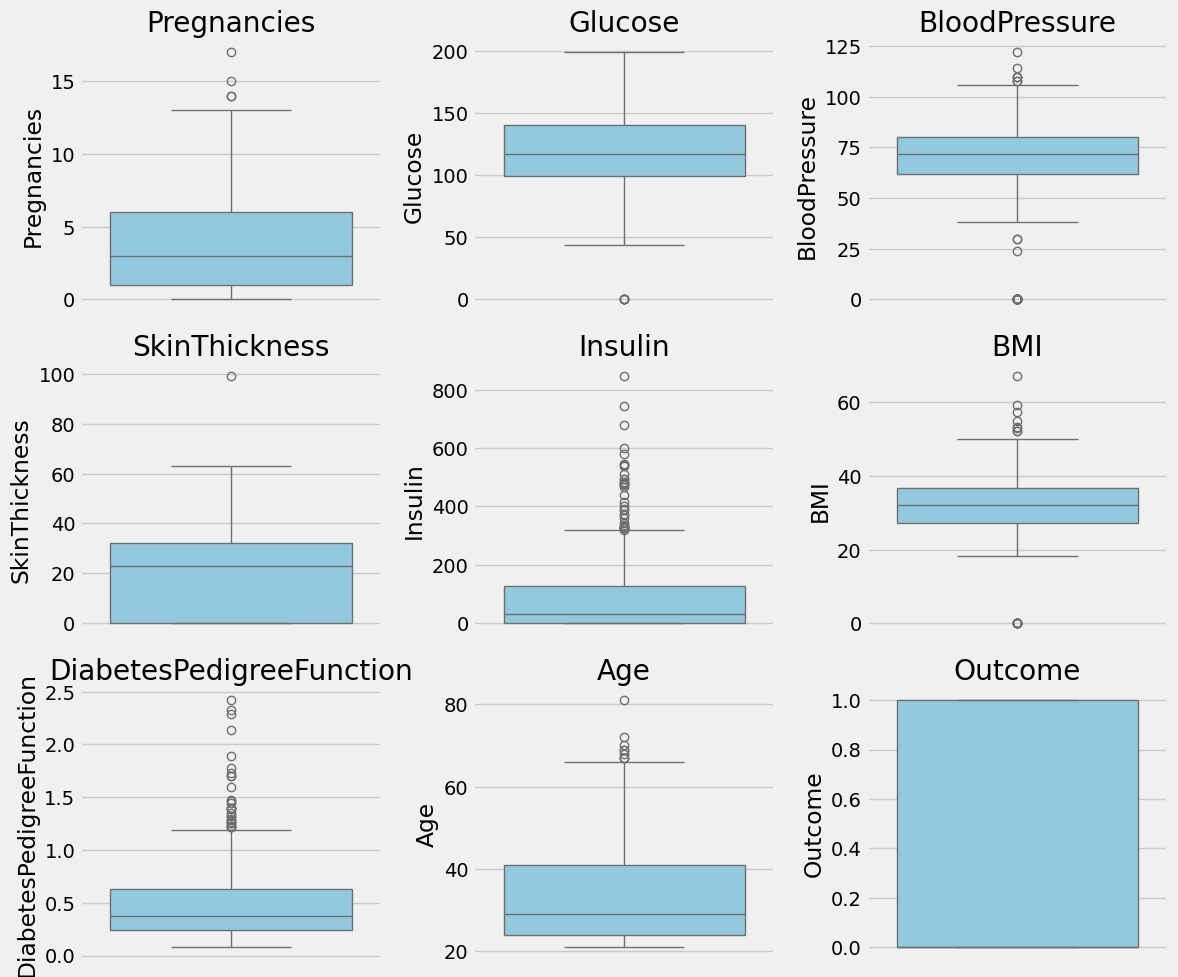

In [11]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column],color='skyblue')
    plt.title(column)

plt.tight_layout()
plt.show()

**We have a large amount of outliers in the Diabetes Pedigree Function Column.**

# Checking outliers

In [12]:
# outliers detection

for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print("Theres are outliers in ",feature)
    else:
        print("Everything is good, No outlier in ", feature)

Theres are outliers in  Pregnancies
Everything is good, No outlier in  Glucose
Theres are outliers in  BloodPressure
Theres are outliers in  SkinThickness
Theres are outliers in  Insulin
Theres are outliers in  BMI
Theres are outliers in  DiabetesPedigreeFunction
Theres are outliers in  Age
Everything is good, No outlier in  Outcome


### Removing Outlier

In [13]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [14]:
columns = ['Pregnancies','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Remove outliers from the specified columns
diabetes = remove_outliers(df,columns)

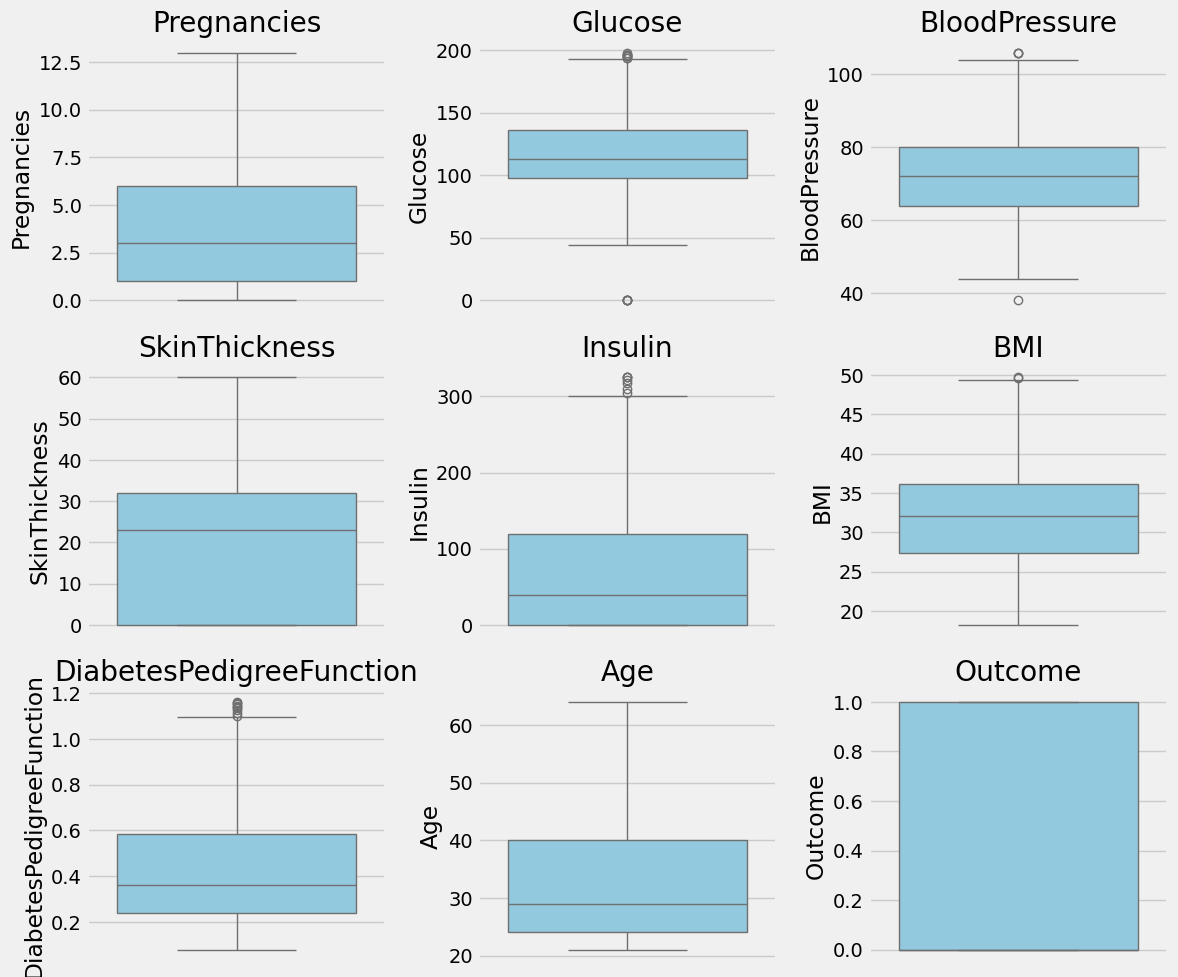

In [15]:
#After removing outlier the box plot look Like

plt.figure(figsize=(12, 10))
for i, column in enumerate(diabetes.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=diabetes[column],color='skyblue')
    plt.title(column)

plt.tight_layout()
plt.show()

# Standarization

In [17]:
scaler = StandardScaler()
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
X_scaled = scaler.fit_transform(X)

# Building Model

In [18]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

# Model Evaluation

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy*100}')
print(f'Precision: {precision*100}')
print(f'Recall: {recall*100}')


Accuracy: 79.6875
Precision: 70.83333333333334
Recall: 47.22222222222222


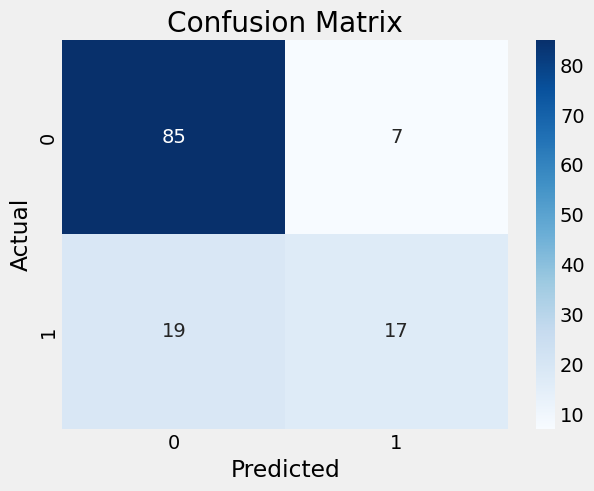

In [25]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        92
           1       0.71      0.47      0.57        36

    accuracy                           0.80       128
   macro avg       0.76      0.70      0.72       128
weighted avg       0.79      0.80      0.78       128

